IMPORT MODULES

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor



IMPORTING CSV FILES

In [72]:
d1=pd.read_csv("Age-standardized suicide rates.csv")
df1=pd.DataFrame(d1)
df1.head()


,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [73]:
d2=pd.read_csv("Crude suicide rates.csv")
df2=pd.DataFrame(d2)
df2.head()

,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1


CLEANING THE IMPORTED DATA

In [74]:
df1.drop_duplicates().head(5)

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [75]:
df2.drop_duplicates().head(5)

,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1


CONVERTING DATATYPES

In [76]:
df1['2000']=df1['2000'].astype(float)
df2[' 80_above']=df2[' 80_above'].astype(float)
df2[' 70to79 ']=df2[' 70to79 '].astype(float)
df2[' 60to69 ']=df2[' 60to69 '].astype(float)
df2[' 50to59 ']=df2[' 50to59 '].astype(float)
df2[' 40to49 ']=df2[' 40to49 '].astype(float)
df2[' 30to39 ']=df2[' 30to39 '].astype(float)
df2[' 20to29 ']=df2[' 20to29 '].astype(float)
df2[' 10to19 ']=df2[' 10to19 '].astype(float)


MERGING THE DATAFRAMES

In [77]:
merged_df = pd.merge(df1, df2, on=['Country','Sex'])
merged_df.head()

,Country,Sex,2016,2015,2010,2000,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Afghanistan,Female,2.1,2.1,2.1,1.7,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Albania,Both sexes,5.6,5.3,7.7,5.8,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Albania,Male,7.0,6.7,9.5,8.2,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1


In [78]:
df1.describe()

,2016,2015,2010,2000
count,549.000000,549.000000,549.000000,549.000000
mean,9.792532,9.925683,10.544991,12.164117
std,7.469341,7.633241,8.620174,10.378318
min,0.000000,0.000000,0.000000,0.100000
25%,4.300000,4.400000,4.700000,5.100000
50%,7.900000,8.100000,8.400000,9.500000
75%,13.400000,13.300000,14.100000,16.000000
max,48.300000,51.500000,62.300000,85.800000


In [79]:
df2.describe()

,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,42.585428,25.936794,17.439162,14.743352,12.189435,10.895446,10.423315,4.075046
std,43.477900,24.795457,14.315504,12.790041,11.121364,10.148280,9.051273,3.393507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.600000,8.400000,6.600000,5.600000,4.800000,4.300000,4.300000,1.700000
50%,26.600000,17.100000,12.900000,11.200000,9.000000,8.000000,7.900000,3.100000
75%,55.500000,35.800000,24.000000,20.000000,16.400000,13.900000,13.500000,5.300000
max,285.000000,133.700000,78.500000,85.400000,86.500000,88.400000,57.400000,24.200000


PLOTTING 

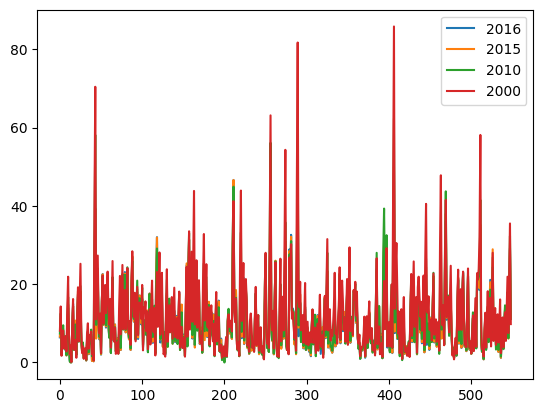

In [80]:
df1.plot()
plt.show()

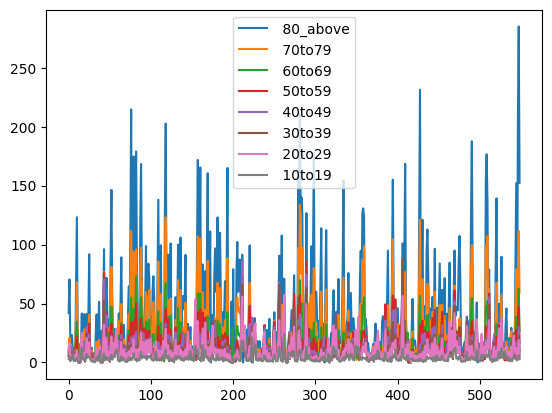

In [81]:
df2.plot()
plt.show()

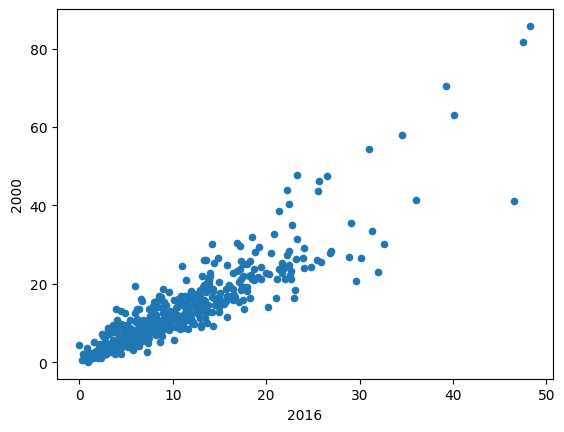

In [82]:
df1.plot(kind = 'scatter', x = '2016', y = '2000')
plt.show()

<Axes: ylabel='Frequency'>

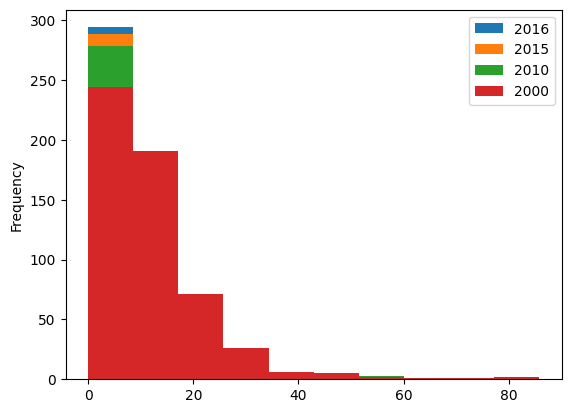

In [83]:
df1.plot(kind='hist')

<Axes: ylabel='Frequency'>

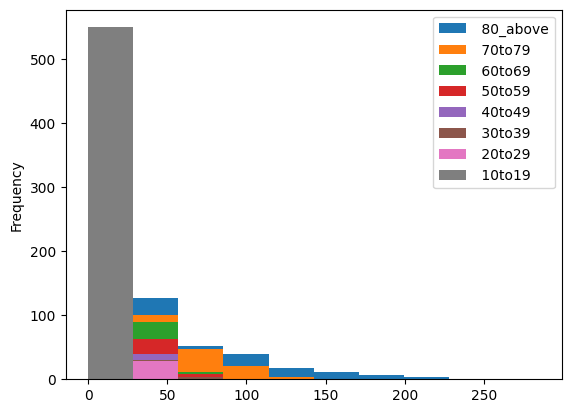

In [84]:
df2.plot(kind='hist')

In [85]:
X=merged_df[['2000','2010','2015','2016']]
X.head(10)

,2000,2010,2015,2016
0,8.1,7.4,6.6,6.4
1,14.3,12.5,10.9,10.6
2,1.7,2.1,2.1,2.1
3,5.8,7.7,5.3,5.6
4,8.2,9.5,6.7,7.0
5,3.6,6.0,4.0,4.3
6,4.7,3.5,3.4,3.3
7,6.7,5.1,5.0,4.9
8,2.8,1.9,1.8,1.8
9,13.9,10.4,9.3,8.9


In [86]:
y=merged_df.drop(columns=['Country','Sex','2000','2010','2015','2016'])
y.head(10)

,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1
5,10.9,4.9,3.9,4.4,5.0,3.4,6.6,7.0
6,9.4,5.6,4.2,4.1,4.7,5.3,4.2,1.3
7,12.7,8.4,6.2,6.2,7.0,7.9,6.2,1.6
8,6.4,3.0,2.2,2.0,2.4,2.6,2.1,1.0
9,63.5,42.1,23.8,14.8,7.0,5.4,6.6,2.6


SPLITTING THE DATA

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

FITTING IN DECISION TREE REGRESSION MODEL

In [88]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
r2_scr_1 = r2_score(y_test, pred1)

In [89]:
r2_scr_1

0.5030631893921631

FITTING IN RANDOM FOREST REGRESSION MODEL

In [90]:
model2 = RandomForestRegressor()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
r2_scr_2 = r2_score(y_test,pred2)

In [91]:
r2_scr_2

0.6887832294762606

PRINTING THE PREDICTION

In [92]:
for i in pred2:
    for j in i:
        print(round(j,1),end=" ")
    print()

10.9 6.6 5.2 3.9 3.6 3.9 4.2 2.0 
78.2 45.8 25.3 22.8 17.5 14.5 12.8 5.0 
11.3 6.9 5.4 4.7 4.3 4.0 4.0 2.2 
28.3 19.4 11.8 8.2 5.6 5.1 5.4 2.2 
24.4 14.8 10.0 8.7 6.9 6.2 6.3 2.7 
51.2 34.1 20.7 11.7 8.2 7.7 6.7 2.7 
9.7 6.7 4.5 4.2 3.5 2.9 2.9 1.3 
109.6 56.5 28.0 22.2 15.2 12.5 10.8 4.3 
37.5 24.3 16.2 12.0 9.0 9.2 9.4 3.4 
9.6 6.3 4.1 4.1 3.3 2.9 2.3 1.0 
23.9 15.4 10.2 8.4 6.1 4.9 4.7 2.1 
131.8 75.4 43.1 33.4 23.2 19.9 18.6 6.6 
21.5 12.0 8.8 8.8 7.6 8.0 8.7 4.9 
58.9 33.8 21.2 18.8 16.8 16.1 18.0 7.8 
58.7 37.3 25.7 21.2 18.1 16.2 18.1 7.0 
10.2 7.9 6.2 5.1 5.1 4.8 6.0 3.8 
13.5 8.0 5.4 3.8 3.6 3.8 4.1 2.0 
6.3 5.0 2.5 2.0 2.0 2.0 2.2 1.0 
115.9 64.1 37.9 30.6 24.2 23.4 22.1 7.9 
145.4 78.7 52.6 52.0 46.8 38.1 31.9 10.8 
136.9 86.2 46.8 31.2 21.1 16.8 15.4 5.3 
19.0 14.0 9.2 6.9 5.5 5.2 5.2 2.1 
44.6 30.6 20.7 17.1 13.6 11.3 11.4 4.2 
39.5 25.4 16.7 12.9 9.7 9.3 8.8 3.1 
37.0 24.4 20.2 15.7 12.7 10.0 11.1 4.1 
88.1 51.9 38.0 39.4 32.8 26.8 24.1 7.2 
5.8 3.1 2.2 1.3 1.1 0.9 1.0 0.